# CUNY Tech Prep 2021 Alumni Survey

## Data Exploration and Visualizations


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from IPython.display import Image
from wordcloud import WordCloud

pd.set_option('display.max_rows', 5)
plt.rcParams['figure.figsize'] = (10,10)

### First things first... load the data


In [3]:
df = pd.read_csv('data/data_masked.csv', sep=',')

### Lets look at the description and information about our dataset


In [4]:
df.columns

Index(['Timestamp',
       'CUNY, Undergrad Graduation Date (ex: City Tech, Fall 2018) ',
       'CUNY Tech Prep Graduation Year ',
       'What best describes you, right now? ',
       'Has the COVID-19 pandemic affected your employment status?',
       'CTP is creating an Alumni Directory that would include name, CUNY alma mater, email address, LinkedIn URL, and current job title & company— would you be open to CTP including your information in the Directory?',
       'If you are an undergraduate student, where (college name) and what are you studying? ',
       'If you are a graduate student, where do you attend (college name) and what are you studying? ',
       'Are you working in a tech role in New York? ',
       'If you're NOT working in New York, what state are you working in? ',
       'What's the name of the company where you work? ',
       'Are you working full-time or part-time?', 'What is your title? ',
       'Reflect on when you received a job offer for either your cur

In [5]:
df.isnull().sum()

Timestamp                                                       0
CUNY, Undergrad Graduation Date (ex: City Tech, Fall 2018)      0
                                                               ..
What did you take away from your time with CTP?                20
Did your internship become a full time job?                    67
Length: 26, dtype: int64

In [6]:
df.duplicated().sum()

0

### Meta/Info Columns

In [7]:
time = df.columns[0]
under_grad = df.columns[1]
ctp_grad= df.columns[2]
describe_you = df.columns[3]
alumni_directory = df.columns[5]
tech_role_nyc = df.columns[8]
company = df.columns[10]
title = df.columns[12]
first_job = df.columns[13]
resources_needed = df.columns[20]
volunteer_opportunities = df.columns[23]

# Convert To Number
df['datetime'] =  pd.to_datetime(df[time],infer_datetime_format=True).apply(lambda x: x.value)

# Companies / Job Info

                                                 count
What's the name of the company where you work?        
Google                                               4
IBM                                                  3
...                                                ...
Flatiron Health                                      1
foursquare                                           1

[43 rows x 1 columns]
Google               0.08
IBM                  0.06
Capital One          0.06
Adobe                0.02
American Express     0.02
Name: What's the name of the company where you work? , dtype: float64


<AxesSubplot:ylabel="What's the name of the company where you work? ">

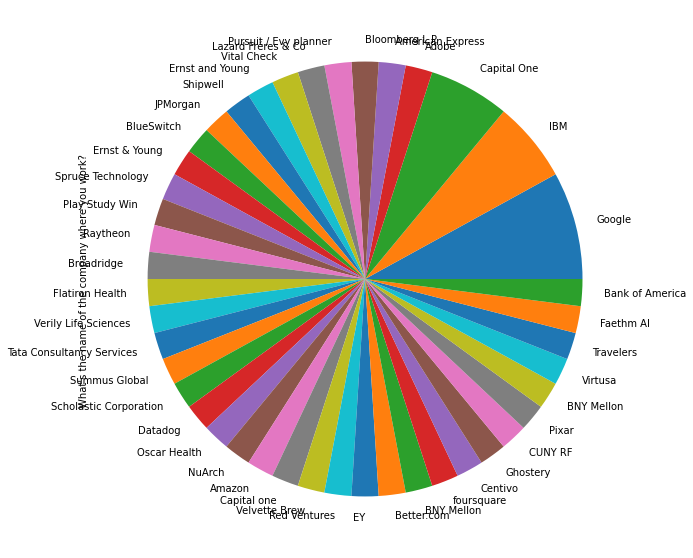

In [8]:
print(df.groupby(company)[company].agg(['count']).sort_values(ascending=False,by="count"))
print(df[company].value_counts(normalize=True).head(5))
df[company].value_counts().plot.pie()

## Working in New York Tech Companies

Google                    0.090909
Adobe                     0.030303
Scholastic Corporation    0.030303
Summus Global             0.030303
Flatiron Health           0.030303
Name: What's the name of the company where you work? , dtype: float64


<AxesSubplot:ylabel="What's the name of the company where you work? ">

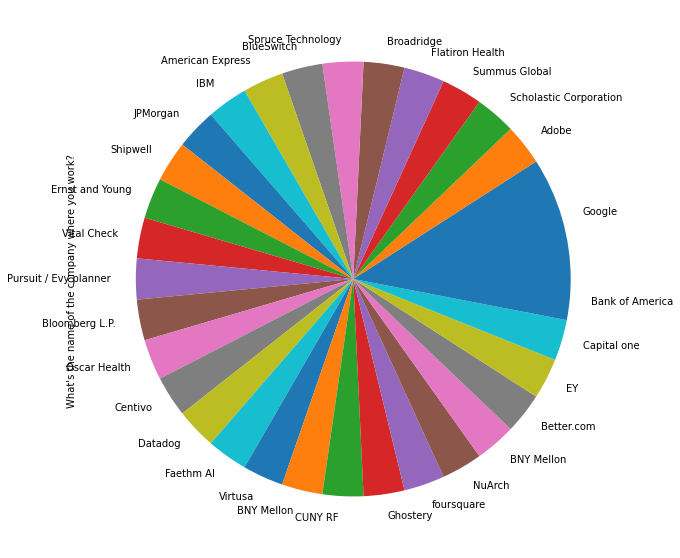

In [9]:
condition =  df[tech_role_nyc]=="Yes"
tech_companies = df[ condition ]
print(tech_companies[company].value_counts(normalize=True).head(5))
tech_companies[company].value_counts().plot.pie()

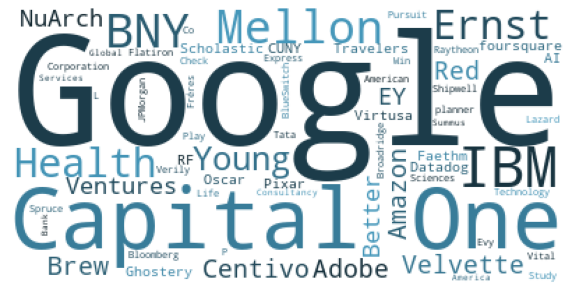

In [10]:
# df_company = df[ df[company].str.strip() != np.nan]
# display(df_company[company].value_counts().keys())
# text = df_company[company].values
tuples = [x for x in df[company].values if str(x) != 'nan']
wordcloud = WordCloud(background_color='white',max_font_size = 150).generate(', '.join(tuples))
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(198,46%%, %d%%)" % np.random.randint(10,51))
wordcloud.recolor(color_func = grey_color_func)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("word_cloud.png", bbox_inches='tight')


 ## Job/Company Titles 

Software Engineer                 7
Associate Software Engineer       3
Devops Engineer                   1
Client Onboarding Data Analyst    1
Technical Consultant              1
Name: What is your title? , dtype: int64


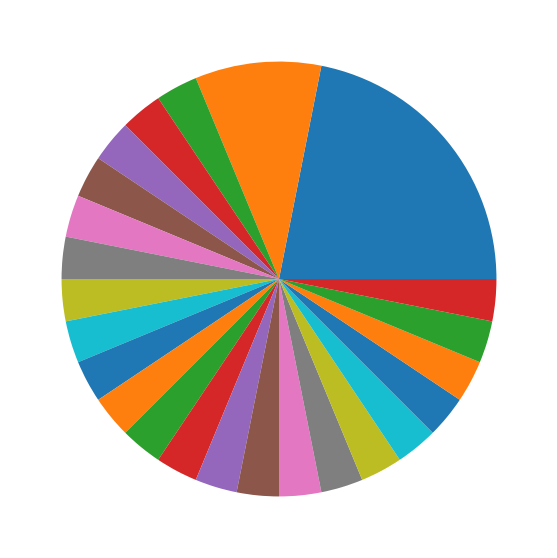

In [11]:
print(tech_companies[title].value_counts().head(5))
tech_companies[title].value_counts().plot.pie(fontsize=0,labeldistance=None)
plt.axis('off')
plt.savefig("jobs.png", bbox_inches='tight')

## The Fastest Company To Respond

<AxesSubplot:xlabel='datetime', ylabel="What's the name of the company where you work? ">

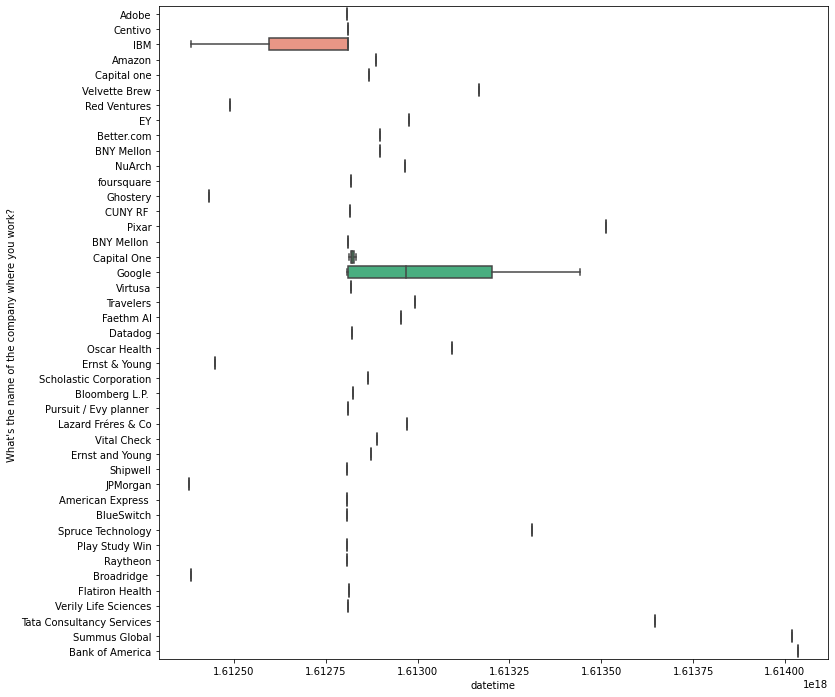

In [12]:
plt.figure(figsize=(12,12))
sns.boxplot(x='datetime',y=company, data=df)

#  CTP Cohort And School Info

Fall 2019 - Spring 2020 (Cohort 5)    34
Fall 2018 - Spring 2019 (Cohort 4)    14
Fall 2017 - Spring 2018 (Cohort 3)    12
Fall 2016 - Spring 2017 (Cohort 2)     7
Name: CUNY Tech Prep Graduation Year , dtype: int64


<AxesSubplot:ylabel='CUNY Tech Prep Graduation Year '>

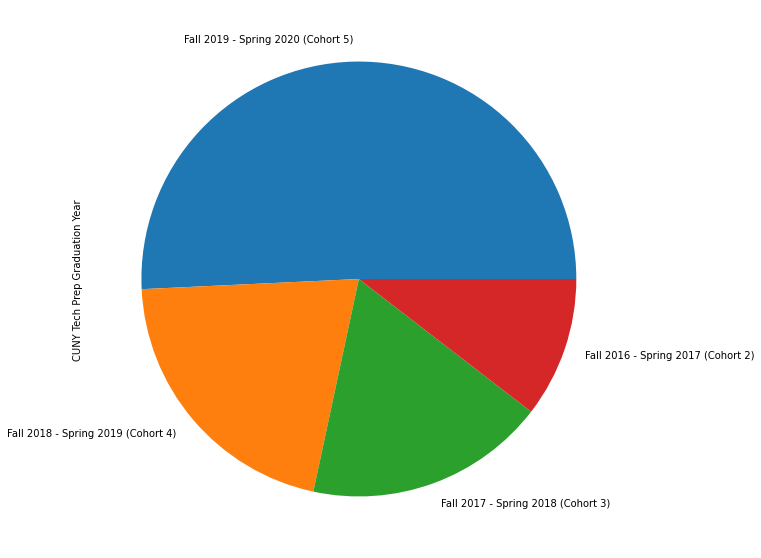

In [13]:
print(df[ ctp_grad ].value_counts())
df[ ctp_grad ].value_counts().plot.pie()

<AxesSubplot:ylabel='CUNY, Undergrad Graduation Date (ex: City Tech, Fall 2018) '>

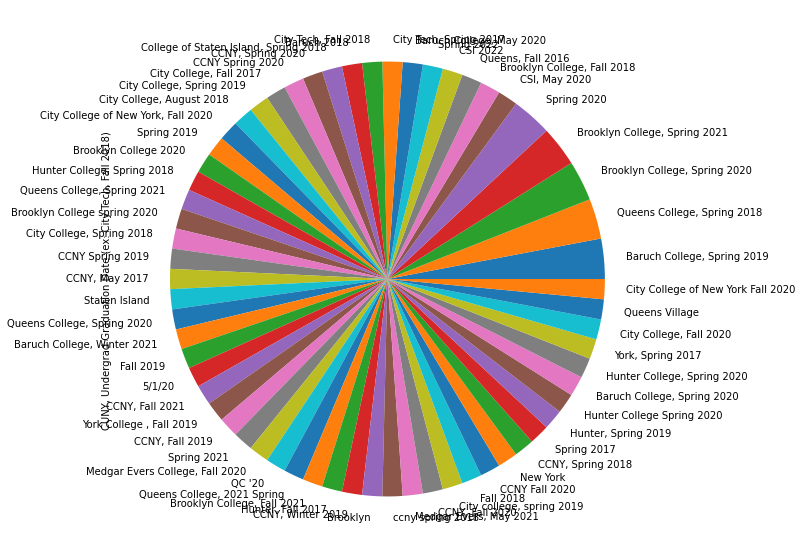

In [14]:
df[under_grad].value_counts().plot.pie()

## Fastest School/Class To Respond

<AxesSubplot:xlabel='datetime', ylabel='CUNY, Undergrad Graduation Date (ex: City Tech, Fall 2018) '>

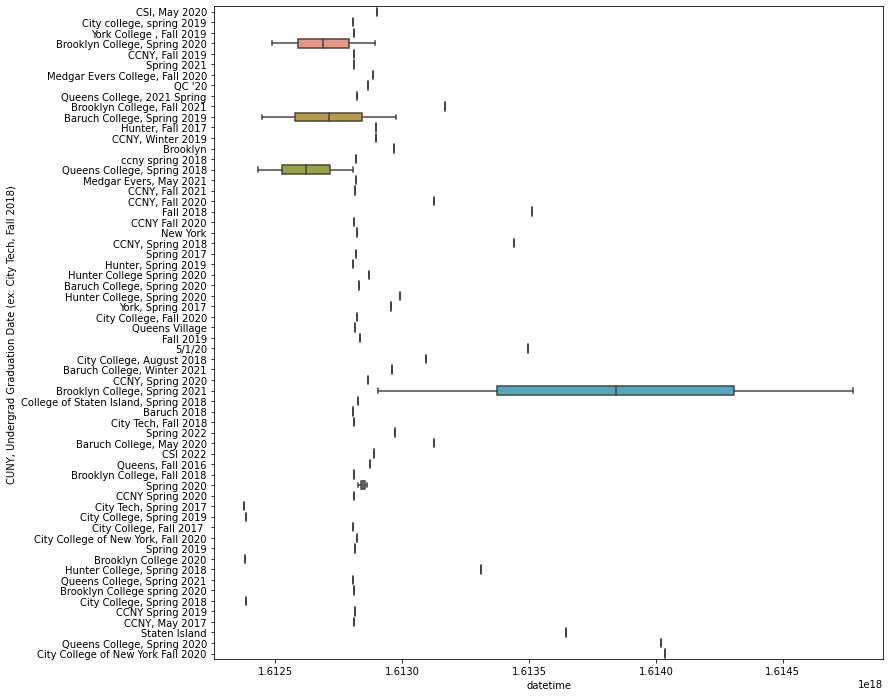

In [15]:
plt.figure(figsize=(12,12))
sns.boxplot(x='datetime',y=under_grad, data=df)

## Fastest Cohort To Respond

<AxesSubplot:xlabel='datetime', ylabel='CUNY Tech Prep Graduation Year '>

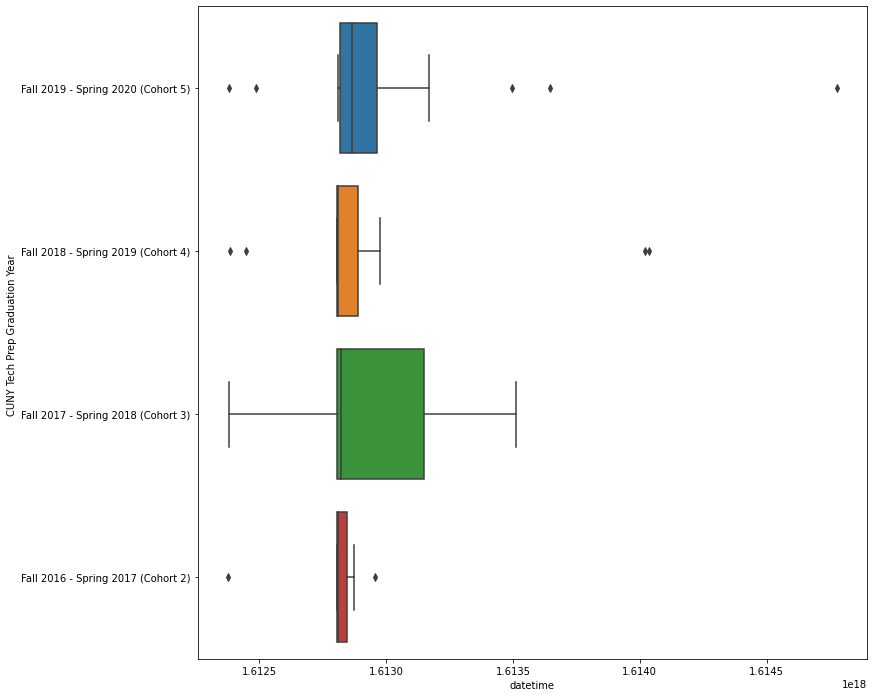

In [16]:
plt.figure(figsize=(12,12))
sns.boxplot(x='datetime',y=ctp_grad, data=df)

# Voluenteer Interest / Resources Needed 

## There are many volunteer opportunities available at CUNY Tech Prep. Check off any of the following that you'd be willing to participate in:

count
There are many volunteer opportunities availabl... What's the name of the company where you work?        
Conducting Mock Technical Interviews               Amazon                                               1
                                                   Bloomberg L.P.                                       1
                                                   Centivo                                              1
                                                   Datadog                                              1
                                                   Vital Check                                          1
Conducting Mock Technical Interviews, Guest Lec... Virtusa                                              1
Conducting Mock Technical Interviews, Screening... Bank of America                                      1
                                                   Capital One                                          2
                                                   Ernst and Young                                      1
                                                   IBM                                                  1
                                                   Summus Global                                        1
                                                   Travelers                                            1
Conducting Mock Technical Interviews, Screening... Shipwell                                             1
Conducting Mock Technical Interviews, Screening... Ghostery                                             1
Conducting Mock Technical Interviews, Screening... Google                                               1
                                                   IBM                                                  1
                                                   JPMorgan                                             1
Conducting Mock Technical Interviews, Screening... IBM                                                  1
Conducting Mock Technical Interviews, Screening... Better.com                                           1
Guest Lecturing Technical and/or Professional D... American Express                                     1
                                                   Capital one                                          1
                                                   EY                                                   1
                                                   Faethm AI                                            1
                                                   foursquare                                           1
Mentoring one (or more) CUNY Tech Prep Project ... NuArch                                               1
Screening applicants for future cohorts of CUNY... Adobe                                                1
Screening applicants for future cohorts of CUNY... Red Ventures                                         1
                                                   Tata Consultancy Services                            1
Taking part in Q&A panel(s) on your experience ... Pixar                                                1

IBM                3
Capital One        2
Centivo            1
Bloomberg L.P.     1
Summus Global      1
JPMorgan           1
Shipwell           1
Ernst and Young    1
Vital Check        1
Travelers          1
Datadog            1
Virtusa            1
Google             1
Ghostery           1
Better.com         1
Amazon             1
Bank of America    1
Name: What's the name of the company where you work? , dtype: int64

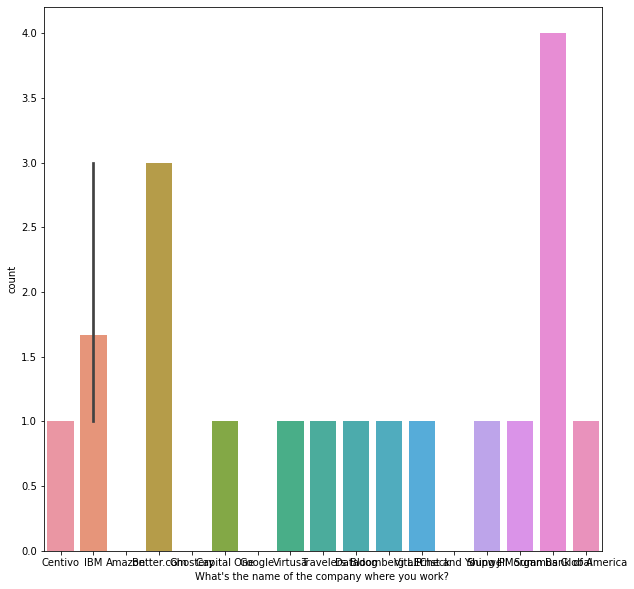

In [17]:
pd.set_option('display.max_rows', None)
display(df.groupby([volunteer_opportunities,company])[company].agg(['count']))
m = df[volunteer_opportunities].str.contains('Conducting Mock Technical Interviews',na=False)
df2 = df[m].reset_index(drop=True)
display(df2[company].value_counts())
df2['count'] = df.groupby(company)[company].transform('count')
#df['count'] = df.groupby(volunteer_opportunities)[volunteer_opportunities].transform('count')

ax = sns.barplot(y='count', x=company,
                 data=df2, dodge=False)

## What resources could CUNY Tech Prep provide to best help you in your search?	

,What's the name of the company where you work?,count
1,Adobe,1.0
2,Centivo,1.0
4,IBM,3.0
6,Amazon,1.0
7,Capital one,1.0
9,Velvette Brew,1.0
10,Red Ventures,1.0
11,EY,1.0
12,Better.com,1.0
13,BNY Mellon,1.0


<AxesSubplot:xlabel='datetime', ylabel="There are many volunteer opportunities available at CUNY Tech Prep. Check off any of the following that you'd be willing to participate in: ">

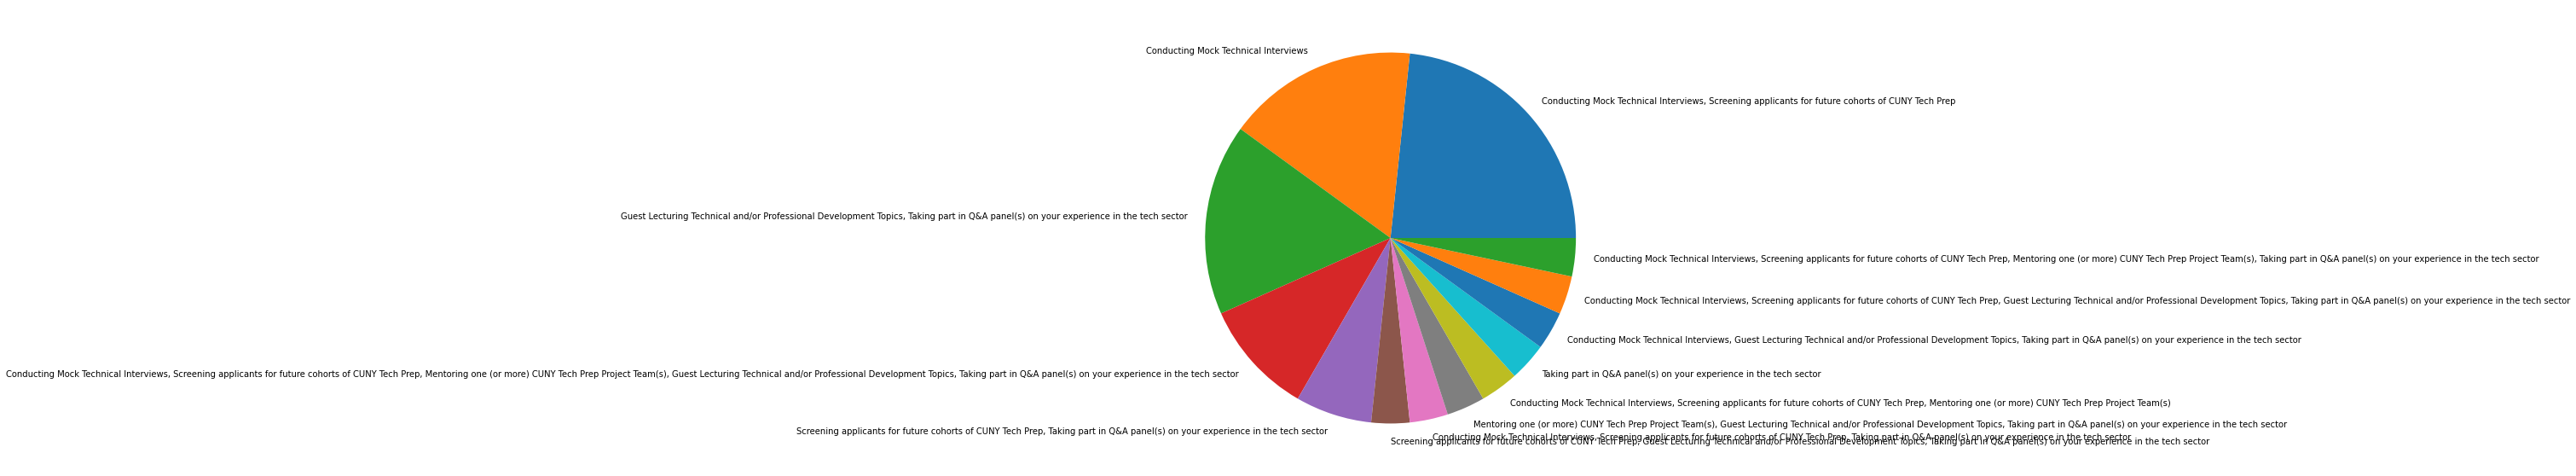

In [ ]:
df['count'] = df.groupby(company)[company].transform('count')
sns.histplot(df[df['count']>0],
               bins=5,
             x="datetime", stat="count", hue=company,palette ="CMRmap_r",multiple="stack",legend=False)
plt.axis('off')
plt.savefig("intreset_overtime.png", bbox_inches='tight')
voluenteer_intrest = df[df['count']>0]
voluenteer_intrest[volunteer_opportunities].value_counts().plot.pie()

Conducting Mock Technical Interviews, Screening applicants for future cohorts of CUNY Tech Prep                                                                                                                                                                                                 0.233333
Conducting Mock Technical Interviews                                                                                                                                                                                                                                                            0.166667
Guest Lecturing Technical and/or Professional Development Topics, Taking part in Q&A panel(s) on your experience in the tech sector                                                                                                                                                             0.166667
Conducting Mock Technical Interviews, Screening applicants for future cohorts of CUNY Tech Prep, Mentoring on

Google                       0.08
IBM                          0.06
Capital One                  0.06
Adobe                        0.02
American Express             0.02
Bloomberg L.P.               0.02
Pursuit / Evy planner        0.02
Lazard Fréres & Co           0.02
Vital Check                  0.02
Ernst and Young              0.02
Shipwell                     0.02
JPMorgan                     0.02
BlueSwitch                   0.02
Ernst & Young                0.02
Spruce Technology            0.02
Play Study Win               0.02
Raytheon                     0.02
Broadridge                   0.02
Flatiron Health              0.02
Verily Life Sciences         0.02
Tata Consultancy Services    0.02
Summus Global                0.02
Scholastic Corporation       0.02
Datadog                      0.02
Oscar Health                 0.02
NuArch                       0.02
Amazon                       0.02
Capital one                  0.02
Velvette Brew                0.02
Red Ventures  

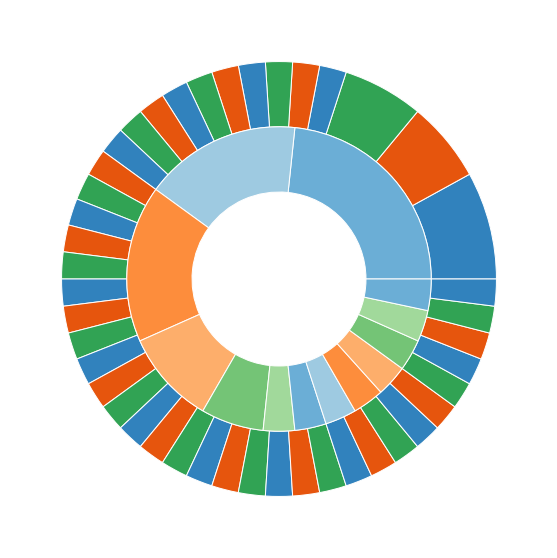

In [107]:
df = df.copy()
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
display(voluenteer_intrest[volunteer_opportunities].value_counts(normalize=True))
#ax.pie(voluenteer_intrest[volunteer_opportunities].value_counts(), radius=1, colors=outer_colors, autopct='%1.1f%%',
#       wedgeprops=dict(width=size, edgecolor='w'),labels=[""] * len(voluenteer_intrest[volunteer_opportunities].value_counts()))

display(voluenteer_intrest[company].value_counts(normalize=True))
# ax.pie(voluenteer_intrest[company].value_counts(), radius=1-size, colors=inner_colors, autopct='%1.1f%%',
#        wedgeprops=dict(width=size, edgecolor='w'),labels=[""] * len(voluenteer_intrest[company].value_counts()))

ax.pie(voluenteer_intrest[company].value_counts(), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(voluenteer_intrest[volunteer_opportunities].value_counts(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
plt.savefig("volunteer_opportunities_company.png", bbox_inches='tight')

plt.show()
plt.show()
plt.close()


In [72]:
df.groupby([ctp_grad,resources_needed], sort=True)[ctp_grad].agg(['count'])

count
CUNY Tech Prep Graduation Year     What resources could CUNY Tech Prep provide to ...       
Fall 2016 - Spring 2017 (Cohort 2) Resume review, Cover letter review, LinkedIn pr...      1
                                   Resume review, Networking events (TTP, alumni, ...      1
Fall 2017 - Spring 2018 (Cohort 3) Networking events (TTP, alumni, etc.)                   1
Fall 2018 - Spring 2019 (Cohort 4) Networking events (TTP, alumni, etc.), Alumni S...      2
                                   Resume review, LinkedIn profile review, Behavio...      1
Fall 2019 - Spring 2020 (Cohort 5) At the moment, not much. I have utilized their ...      1
                                   Hard to say. I've literally received nothing back.      1
                                   LinkedIn profile review, Behavioral interview p...      1
                                   Networking events (TTP, alumni, etc.), Alumni S...      1
                                   Networking events (TTP, alumni, etc.), Alumni S...      1
                                   Resume review, Behavioral interview prep                1
                                   Resume review, Behavioral interview prep, Netwo...      1
                                   Resume review, Behavioral interview prep, Netwo...      1
                                   Resume review, Behavioral interview prep, pract...      1
                                   Resume review, Cover letter review, LinkedIn pr...      6
                                   Resume review, Cover letter review, LinkedIn pr...      1
                                   Resume review, Cover letter review, LinkedIn pr...      1
                                   Resume review, LinkedIn profile review                  1
                                   Resume review, LinkedIn profile review, Behavio...      1
                                   Resume review, LinkedIn profile review, Behavio...      1
                                   Resume review, LinkedIn profile review, Behavio...      1

<AxesSubplot:>

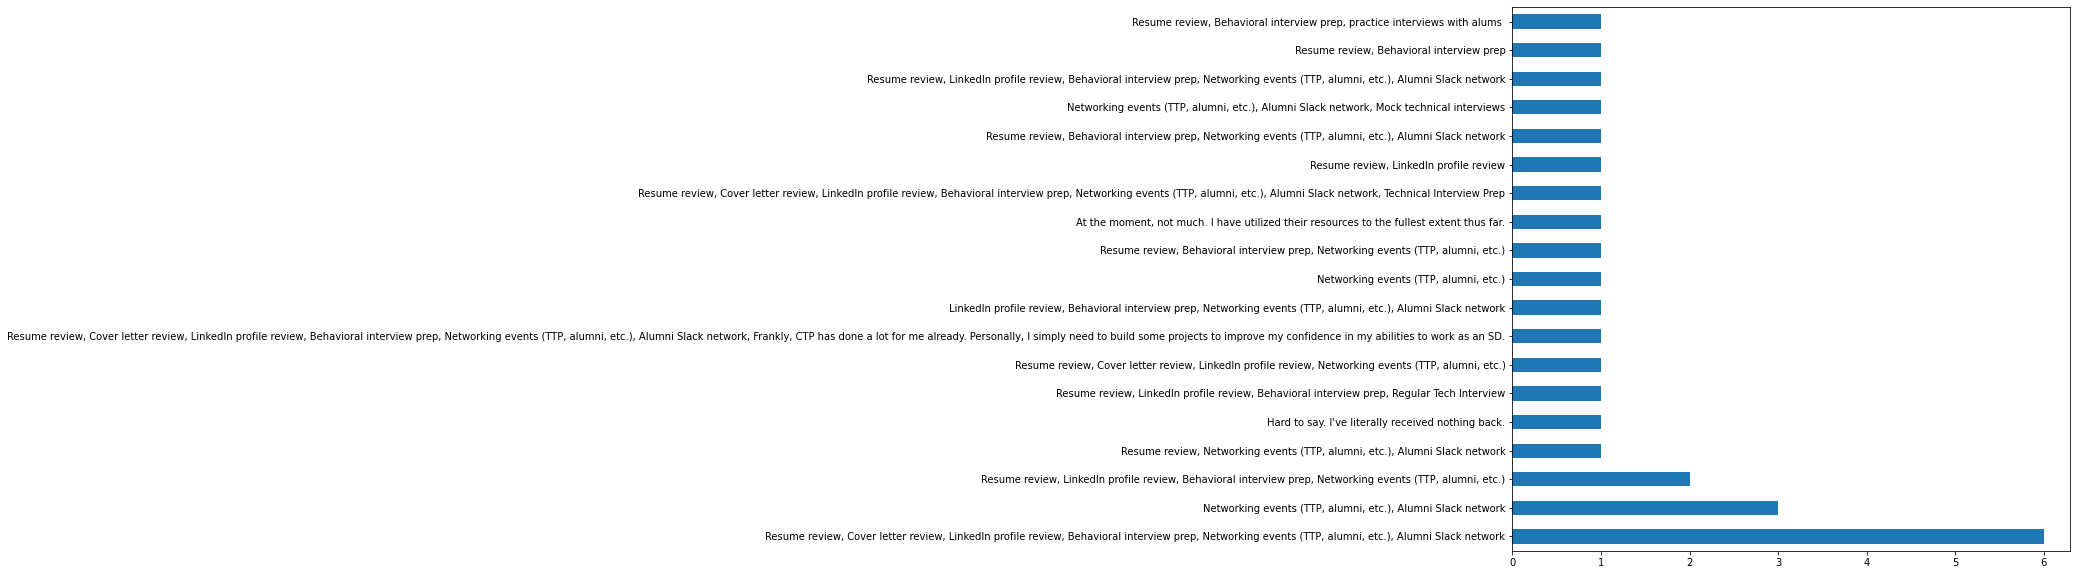

In [73]:
df[resources_needed].value_counts().plot.barh()

# Where are CTP Alumni Now?

<AxesSubplot:ylabel='What best describes you, right now? '>

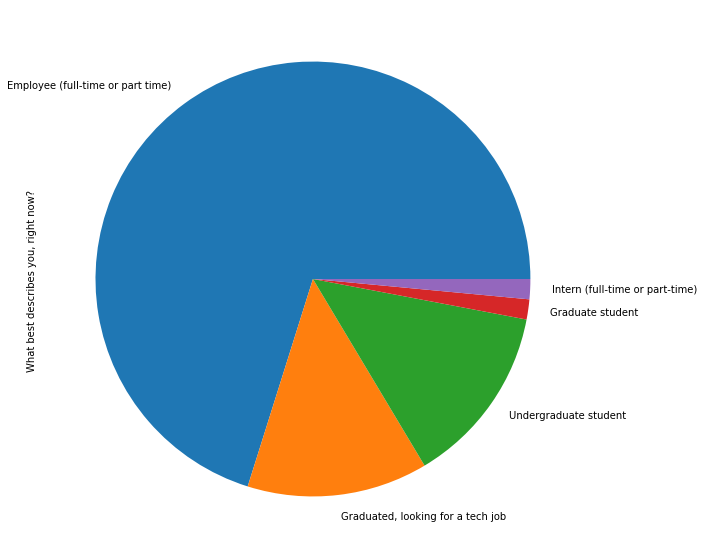

In [74]:
df[describe_you].value_counts()
df[describe_you].value_counts().plot.pie()

## What best describes you, right now?	

In [75]:
pd.set_option('display.max_rows', None)
df.groupby([describe_you,ctp_grad])[ctp_grad].agg(['count'])

count
What best describes you, right now?  CUNY Tech Prep Graduation Year           
Employee (full-time or part time)    Fall 2016 - Spring 2017 (Cohort 2)      6
                                     Fall 2017 - Spring 2018 (Cohort 3)     12
                                     Fall 2018 - Spring 2019 (Cohort 4)     13
                                     Fall 2019 - Spring 2020 (Cohort 5)     16
Graduate student                     Fall 2019 - Spring 2020 (Cohort 5)      1
Graduated, looking for a tech job    Fall 2016 - Spring 2017 (Cohort 2)      1
                                     Fall 2019 - Spring 2020 (Cohort 5)      8
Intern (full-time or part-time)      Fall 2019 - Spring 2020 (Cohort 5)      1
Undergraduate student                Fall 2018 - Spring 2019 (Cohort 4)      1
                                     Fall 2019 - Spring 2020 (Cohort 5)      8